<a href="https://colab.research.google.com/github/franciscodlsb/MLSS2020TU/blob/master/MLSS2020TU_Practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 1: Neural Network using Tensorflow

© Machine Learning Summer School - Telkom University

---


<table  class="tfo-notebook-buttons" align="left"><tr><td>
    
<a href="https://colab.research.google.com/github/adf-telkomuniv/MLSS2020_Telkom/blob/master/practical%201/MLSS2020TU%20-%20Practical%201.ipynb" source="blank" ><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>
    
</td><td>
<a href="https://github.com/adf-telkomuniv/MLSS2020_Telkom/blob/master/practical%201/MLSS2020TU%20-%20Practical%201.ipynb" source="blank" ><img src="https://i.ibb.co/6NxqGSF/pinpng-com-github-logo-png-small.png"></a>
    
</td></tr></table>


You have written codes in self-practice to provide a whole host of vectorized neural network functionality.

For this exercise, though, we're going to leave behind your beautiful codebase and instead migrate to one of two popular deep learning frameworks: in this instance, **TensorFlow**

The goals of this assignment are as follows:
* Understand how to use **Tensorflow Eager** and **Keras Layers API** to build a neural network architecture
* Building Model using Sequential and Functional API
* Understand how a model is trained and evaluated
* Understand the concept of train / validation / test split and why it's useful
* Research at least 1 technique that can be used to improve model generalization




---
---
#[Part 0] Preparation

---
## About Tensorflow


<img src="https://www.gstatic.com/devrel-devsite/prod/vbf66214f2f7feed2e5d8db155bab9ace53c57c494418a1473b23972413e0f3ac/tensorflow/images/lockup.svg" alt="tensorflow" width="300px"/>

[TensorFlow (TF)](https://www.tensorflow.org/) is a **Deep Learning Library**, developed by the Google Brain Team within the Google Machine Learning Intelligence research organization, for the purposes of machine learning and artificial neural network research.

TensorFlow is a system for executing computational graphs over Tensor objects, with native support for performing backpropagation for its Variables. In it, we work with Tensors which are n-dimensional arrays analogous to the numpy ndarray.



**Tensorflow Key Features**

* Define, optimize and efficiently calculate mathematical expressions involving multi-dimensional arrays (tensors).
* Programming support from deep neural networks and machine learning techniques.
* Use of GPU and TPU computing and automatic memory optimization.
* High computing capability across machines and large data sets.

TensorFlow is available with Python and C ++ support, but the Python API is more supported and easier to learn.




---
## About Keras

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" alt="keras" width="300px"/>

[Keras](https://keras.io/) is a very modular and minimalist **Deep Learning Library**, written in Python and capable of running on TensorFlow or Theano. This library was developed with a focus on enabling fast experiments.

At first Keras was developed to help users to easily use Theano and Tensorflow's which at the time was very technical and complex in implementation.

Since Tensorflow version 1.5, Keras was adopted by Google and since then the built API has been included in the Tensorflow distribution.

---

Working with Tensorflow will give us benefits:

* Our code will now run on GPUs! Much faster training. Writing your own modules to run on GPUs is beyond the scope of this class, unfortunately.

* We want you to be ready to use one of these frameworks for your project so you can experiment more efficiently than if you were writing every feature you want to use by hand. 

* We want you to stand on the shoulders of giants! TensorFlow and PyTorch are both excellent frameworks that will make your lives a lot easier, and now that you understand their guts, you are free to use them :) 

* We want you to be exposed to the sort of deep learning code you might run into in academia or industry. 

---
## GPU Runtime
Since we're going to use TensorFlow, we can utilize the GPU to accelerate the process

For that, make sure that this Colaboratory file is set to use GPU

* select **Runtime** in taskbar
* select **Change Runtime Type**
* choose Hardware accelerator **GPU**

<center>
  
![gpu](https://i.ibb.co/QX3Brf0/gpu.png)


---
## Import Libraries

Import required libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, datetime

%matplotlib inline
%load_ext tensorboard

# tensorboard log
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

---
# [Part 1] CIFAR-10 Dataset

In this practical, we use the CIFAR-10 dataset consisting of  60,000 $32\times32$ colour images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images

The idea is to train a classifier to identify the class value (what kind of object it is) given the image. We train and tune a model on the 50,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. 

This task is an example of a supervised learning problem, where we are given both input and labels (targets) to learn from. 

---
## 1 - Load Dataset

Tensorflow has convenient modules for loading a number of standard datasets.

You can see the various datasets provided on the following link:
* [keras](https://keras.io/datasets/)
* [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)
* [tf.dataset](https://www.tensorflow.org/datasets/datasets)

for that, here let's download the mnist dataset from `tf.keras` as follows

In [2]:
(X_train_ori, y_train), (X_test_ori, y_test) = tf.keras.datasets.cifar10.load_data()

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


170500096/170498071 [==============================] - 4s 0us/step


---
## 2 - Visualizing Data

Each image in the dataset consists of a $32 \times 32\times3$ matrix. Each image is assigned a corresponding numerical label, so the image in ```X_train_ori[i]``` has its corresponding label stored in ```y_train[i]```. We also have a lookup array called ```class_names``` to associate a text description with each of the numerical labels. For example, the label 1 is associated with the text description "Plane".

Show the first 20 images from `X_train`

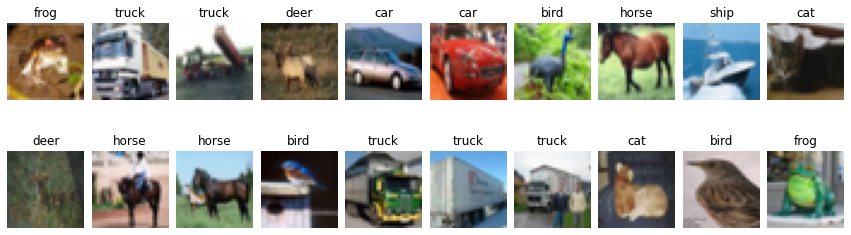

In [3]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
label = y_train.ravel()
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train_ori[i+j*10])
        ax[j,i].set_title(class_names[label[i+j*10]])
        ax[j,i].axis('off')
plt.show()

---
## 3 - Split Validation Data

When we build machine learning models, the goal is to build a model that will perform well on *future* data that we have not seen yet. We say that we want our models to be able to **generalize** well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. 

To do this, we split whatever data we have available into a **training set, a validation set and a test set**. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. 

The test set (which we never train on), therefore acts as a proxy for our future data, and **should not** be used during observation.

Now let's remove 10,000 images and labels from the training set to use as a validation set. 

In [4]:
X_val_ori   = X_train_ori[-10000:,:]
y_val       = y_train[-10000:]

X_train_ori = X_train_ori[:-10000, :]
y_train     = y_train[:-10000]

In [5]:
a = [1,2,3, 4, 5]
print(a[-2:])
print(a[:-1])

[4, 5]
[1, 2, 3, 4]


---
## 4 - Normalize Data

Normalization refers to normalizing the data dimensions so that they are of approximately the same scale. There are two common ways of achieving this normalization. One is to divide each dimension by its standard deviation, once it has been zero-centered (Mean subtraction preprocessing)

Mean subtraction is the most common form of preprocessing. It involves subtracting the mean across every individual feature in the data, and has the geometric interpretation of centering the cloud of data around the origin along every dimension

In [6]:
X_train = X_train_ori.astype('float32')
X_val   = X_val_ori.astype('float32')
X_test  = X_test_ori.astype('float32')

mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
std_pixel  = X_train.std(axis=(0, 1, 2), keepdims=True)

X_train = (X_train - mean_pixel) / std_pixel
X_val   = (X_val - mean_pixel) / std_pixel
X_test  = (X_test - mean_pixel) / std_pixel

# X_train /= 255
# X_val   /= 255
# X_test  /= 255

image_shape = X_train.shape[1:]

Check the implementation

In [7]:
print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)

X_train.shape = (40000, 32, 32, 3)
X_val.shape   = (10000, 32, 32, 3)
X_test.shape  = (10000, 32, 32, 3)


In [8]:
print('y_train.shape =',y_train.shape)
print('y_val.shape   =',y_val.shape)
print('y_test.shape  =',y_test.shape)

y_train.shape = (40000, 1)
y_val.shape   = (10000, 1)
y_test.shape  = (10000, 1)


---
# [Part 2] Preparing Data with TensorFlow
At the moment, our training data consists of two large tensors. The images are stored in a tensor of shape $[40000, 32, 32, 3]$, consisting of all the $32 \times 32 \times 3$ images matrices stacked together. The labels are stored in a 1D vector of shape $[40000]$. 

We wish to train a model using **mini-batch stochastic gradient descent**. In order to do so, we need to shuffle the data and split it into smaller (mini-)batches. We also convert the data from numpy arrays to TensorFlow Tensors.

In order to do this batching (and shuffling) we will use the Tensorflow [Dataset API](https://www.tensorflow.org/api_docs/python/tf/data/Dataset), which is a set of simple reusable components that allow you to build efficient data pipelines. 

---
## 1 - Define Batch Dataset

We start by defining the `batch_size` hyperparameter of our model. 
> This hyperparameter controls the sizes of the mini-batches (chunks) of data that we use to train the model. The value you use will affect the memory usage, speed of convergence and potentially also the performance of the model. It also interacts with the learning rate used in gradient descent.  

Then, we  group the image and label tensors together into a tuple and then split them into individual entries using [from_tensor_slices()](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices) function.

The next thing we do is add a shuffle component and put the batch component to return a random batch of slices from the dataset. The output of this pipeline will be tuples of tensors containing images and label. The images will be of shape `(batch_size, 32, 32, 3)` and the labels of shape `(batch_size, )`

In [9]:
# define the batch size
batch_size = 128

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.shuffle(buffer_size=batch_size * 10)
train_ds = train_ds.batch(batch_size)


We do the same for the validation dataset, except we don't need to shuffle this time.

In [10]:
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds = val_ds.batch(batch_size)

---
# [Part 3] Keras Model API
Implementing a neural network using the low-level TensorFlow API is a good way to understand how TensorFlow works, but it's a little inconvenient.

Furthermore, since the release of version 2.0, Tensorflow is standardizing its implementation using High-level Keras API. This is enabled by the introduction of the ["Eager Execution mode"](https://www.tensorflow.org/guide/eager) which allows you to evaluates Tensor operations imperatively (in the order you write them), similar to NumPy and PyTorch, without building graphs.

Eager-mode is slightly less performant but a lot more intuitive. This makes it easy to get started with TensorFlow and debug models, and it reduces boilerplate as well.


In this part of the notebook we will define neural network models using the&nbsp; `tf.keras.Sequential` &nbsp;and&nbsp; `tf.keras.Model` API. 


---
## 1 - Keras Model and Layers

Keras is a Deep Learning API that was built as an independent open source project by more than 700 contributors. 

During its construction until, Keras is constantly updated so that there are often changes in the technical side of writing code. One of them is how to define a network model.

There are two basic model building in Keras, using linear [**Sequential**](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model, or using more advance graphical [**Models**](https://www.tensorflow.org/api_docs/python/tf/keras/Model).

For now, let's import those two packages


In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras import Model


For this example, let's create a **2 layers neural network** with **100 neurons** in its hidden layer

There are four types of layers that we will use to build this model:

     * Input layer      to receive input shape
     * Flatten layer    to reshape input into one-dimensional matrix for neural network
     * Dense layer      to add affine fully connected layer
     * Activation layer to add nonlinearity
     
For other types of layers, you can look it in **[tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers)**

In [12]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

---
## 2 - Old Sequential API

The first way to build a model using Keras, and one of the oldest ways, is to initialize the [**Sequential**](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model object, 

then one by one we add the layers that we want to stack as follows


In [13]:
model = Sequential(name='my_model_1')

model.add( Input(image_shape) )         # input layer to receive image 32x32x3
model.add( Flatten() )                  # Flatten layer to reshape input into 3072x1
model.add( Dense(100) )                 # First affine layer (hidden layer) with 100 neurons
model.add( Activation('sigmoid') )      # Sigmoid activation function
model.add( Dense(10) )                  # Second affine layer (output layer) with 10 neuron
model.add( Activation('softmax') )      # Softmax activation function

model.summary()

Model: "my_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


---
## 3 - Compact Sequential API

The update on the Keras layer API allows us to add the input shape into the first layer directly.
It also allows up to add the activation function directly from the `Dense` layer without adding the `Activation` layer. 


In [14]:
# create model new
model = Sequential(name='my_model_2')

model.add( Flatten(input_shape=image_shape) )    # Flatten layer to receive image 32x32x3 and reshape it into 3072x1
model.add( Dense(100, activation='sigmoid') )    # First affine layer (hidden layer) with 100 neurons and sigmoid activation
model.add( Dense(10,  activation='softmax') )    # Second affine layer (output layer) with 10 neuron and softmax activation
      
model.summary()

Model: "my_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


---
## 4 - Functional Model API
The third way to build models is to use **functional API** which allows us to build more complex model graphs, for example, having many input and output. The functional API can handle models with non-linear topology, models with shared layers, and models with multiple inputs or outputs. After the graph is defined, group layers into an object using [**Models**](https://www.tensorflow.org/api_docs/python/tf/keras/Model) module

The following is an example of building a model using **functional API**

In [15]:

# create model graph
in_node  = Input(shape=image_shape)               # define input node to receive image 32x32x3
x        = Flatten() (in_node)                    # define x node as Flatten layer that receive input node
x        = Dense(100, activation='sigmoid')(x)    # pass x node to Dense hidden layer
out_node = Dense(10,  activation='softmax')(x)    # define output node as Dense layer that receive x node

# initialize the model
model = Model(in_node, out_node, name='my_model_3')

model.summary()


Model: "my_model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


---
## 5 - Sequential API (Current)
The fourth way is a new way, and the current standard, of building a Sequential model. 

Similar to the first and second ways, but we can directly register the layers in the list when initializing the Sequential object as follows

In [16]:
# create model compact sequential

model = Sequential([                    
    Flatten(input_shape=image_shape),   # Flatten layer to receive image 32x32x3 and reshape it into 3072x1
    Dense(100, activation='sigmoid'),   # First affine layer (hidden layer) with 100 neurons and sigmoid activation  
    Dense(10,  activation='softmax')    # Second affine layer (output layer) with 10 neuron and softmax activation
], name='my_model_4')


model.summary()

Model: "my_model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


---
# [Part 4] Tensorflow Training Function

In graph mode, TensorFlow builds up a "computation graph" which captures all operations of the model and their dependencies. For training, the gradient can then be computed by traversing backwards from every node through its dependents and applying the "chain rule" of differentiation.

However, in Eager mode, we don't have the concept of the computation graph anymore. Operations are performed imperatively (in the order in which they were executed). 


---
## 1 - Define Model

In this section we'll build a classifier. Specifically, we will build a classifier that takes in (a batch of) $[32\times32\times3]$ CIFAR-10 images as we've seen above, and outputs predictions about which class the image belongs to. 


> <font color='red'>**EXERCISE**: </font> Define your classification model. 

You can define the model using Sequential or Functional API. You can also experiment by trying to change the layer type, activation functions, and number of neurons. However, for this pipeline, do not add activation function to the output layer.

In [17]:
model = Sequential([
                             
    Flatten(input_shape=image_shape),  

    Dense(256, activation='relu'),   # add a dense layer with 256 neurons and relu activation
    Dense(128, activation='relu'),   # add a dense layer with 128 neurons and relu activation

    # Create an "output layer" with 10 neurons, 
    # do not add activation to this output layer
    Dense(10),

], name='my_model')


### Activation Functions

Activation functions are a core ingredient in deep neural networks. In fact they are what allows us to make use of multiple layers in a neural network. There are a number of different activation functions, each of which are more or less useful under different circumstances. The four activation functions that you are most likely to encounter are, arguably, [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU), [Tanh](https://www.tensorflow.org/api_docs/python/tf/keras/activations/tanh), [Sigmoid](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid), and [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Softmax). 

More of activation functions can be seen at [keras activations](https://keras.io/api/layers/activations/) or [tf.keras activations](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation)

### Model Summary

The following summary shows how many parameters each layer is made up of (the number of entries in the weight matrices and bias vectors). Note that a value of ```None``` in a particular dimension of a shape means that the shape will dynamically adapt based on the shape of the inputs.

In [18]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


### Plot Model

Plot model is a utility function to converts a Keras model to dot format and save to a file. This enables us to visualize the model more easily, especially for non-linear models.

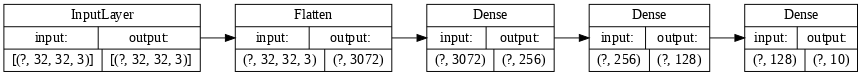

In [19]:
from tensorflow.keras.utils import plot_model

plot_model(model, 
           to_file=model.name+'.png', 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='LR',
           dpi=70
          )


---
## 2 - Optimizer and Loss

To optimize the model, we need to specify a loss function for our classifier. This tells us how good our model's predictions are compared to the actual labels (the targets), with a lower loss meaning better predictions. 
The optimizer also responsible for controlling the learning rate.


### Optimizer Functions

There are various types of optimization functions such as:
* `sgd` &nbsp;for standard&nbsp; `stochastic gradient descent`, including &nbsp;`nesterov`
* `rmsprop` &nbsp;which is a further development of 'sgd'
* `adam` &nbsp;as the current standard optimization function
* and many others

<br>

Here we use the **Adam optimizer** to train our neural networks. Adam is a variant of stochastic gradient descent which often performs well in practice. Here is an illustration showing how a few of these methods perform on a toy problem: 

<table>
  <tr><td  align="center">
    <img src="https://cs231n.github.io/assets/nn3/opt1.gif" width="70%" 
         alt="Optimization algorithms visualized over time in 3D space.">
  </td></tr>
  <tr><td align="center">
    <b>Figure:</b> Optimization algorithms visualized over time in 3D space.<br/>(Source: <a href="http://cs231n.github.io/neural-networks-3/">Stanford class CS231n</a>, MIT License, Image credit: <a href="https://twitter.com/alecrad">Alec Radford</a>)
  </td></tr>
</table>

In [20]:
# Instantiate an optimizer to train the model.
optimizer   = tf.keras.optimizers.Adam()



More of optimizer functions can be seen at [keras optimizers](https://keras.io/api/optimizers/) or [tf.keras optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

### Loss Functions

there are also various types of **loss functions** for various cases such as:
* `categorical crossentropy` &nbsp; for multi-class classifications
* `binary crossentropy` &nbsp; for binary classification
* `mean squared error` &nbsp; for regression
* and many others

<br>

The standard loss function to use with a multi-class classifier is the **cross-entropy loss** also known as the "negative log likelihood" for a classifier.

For a a classification problem with $C$ classes, the cross-entropy loss is defined as

$$Loss = -\frac{1}{N}\sum_{i=1}^N \sum_{c=1}^C log( p(y|X_i)_c) \mathbb{1}[y_i=c]$$


Fortunately we don't need to write this function ourselves as Tensorflow provides a version called 

```tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)```.

In [21]:
# Instantiate a loss function.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)



More of loss functions can be seen at [keras losses](https://keras.io/api/losses/) or [tf.keras losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

### Metrics Function

Select metrics to measure the loss and the accuracy of the model. 
These metrics accumulate the values over epochs and then print the overall result.

In [22]:
from tensorflow.keras import metrics

train_loss     = metrics.Mean(name='train_loss')
val_loss       = metrics.Mean(name='val_loss')

train_accuracy = metrics.SparseCategoricalAccuracy(name='train_accuracy')
val_accuracy   = metrics.SparseCategoricalAccuracy(name='val_accuracy')

---
## 3 - Step Function


The default runtime in TensorFlow 2.0 is eager execution. TensorFlow uses a mechanism called the **"GradientTape"** for computing gradients in Eager mode. 

Basically, the gradient tape records the order of all operations as they are executed, and can then be "run backwards" (traversed from last to first operation) for computing the gradients.

This is great for debugging, but graph compilation has a definite performance advantage. 

Decribing your computation as a static graph enables the framework to apply global performance optimizations.


### Train Step
Define a function to train the model using `tf.GradientTape`. This opens a GradientTape to record the operations run during the forward pass, which enables auto-differentiation. Inside the function we run the forward pass of the layer, and update the parameters using the recorded gradients of the trainable variables.


> <font color='red'>**EXERCISE**: </font> complete the function

In [28]:
@tf.function
def train_step(x, y):

    # Initialise a GradientTape to track the operations
    with tf.GradientTape() as tape:

        # Compute the logits (un-normalised scores) of the current batch of examples
        # using the neural network architecture we defined earlier
        # run model() with input x and set training=True
        logits = model(x,y)
        

        # Compute the loss value for this minibatch.
        # call loss_fn() function with input y and logits
        loss_value = loss_fn(y, logits)

    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss.
    gradients = tape.gradient(loss_value, model.trainable_weights)

    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    # Update train metrics
    train_loss(loss_value)
    train_accuracy.update_state(y, logits)
    


### Test Step

Define a function to evaluate the model. This function will run a validation loop at the end of each epoch.

> <font color='red'>**EXERCISE**: </font> complete the function

In [29]:
@tf.function
def test_step(x, y):

    # run model() with input x and set training=False
    logits = model(x, training=False)

    # call loss_fn() function with input y and logits
    loss_value = loss_fn(y, logits)

    # Update val metrics
    val_loss(loss_value)
    val_accuracy.update_state(y, logits)

    return logits, loss_value, val_accuracy.result()


---
## 4 - Training Loop

Define the training loop as follow:
* Define a `for` loop that iterates over epochs. For each epoch:
    * open a `for` loop that iterates over the training dataset, in batches.
      <br>for each train batch, call the `train_step()` function
    * open another `for` loop that iterates over the validation dataset, in batches.
      <br>for each validation batch, call the `test_step()` function

> <font color='red'>**EXERCISE**: </font> complete the function

In [30]:
# The number of epochs to run
num_epochs = 20  

# Lists to store the loss and accuracy of every epoch
history = {}
history['loss']     = []
history['val_loss'] = []
history['acc']      = []
history['val_acc']  = []

for epoch in range(num_epochs):

    # Loop over our data pipeline
    for x_batch_train, y_batch_train in train_ds:
        # call train_step() function with input x_batch_train and y_batch_train
        train_step(x_batch_train, y_batch_train)
        
    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in val_ds:
        # call test_step() function with input x_batch_val and y_batch_val
        test_step(x_batch_val, y_batch_val)
    
    # add current loss and accuracy to history
    history['loss'].append(train_loss.result())
    history['val_loss'].append(val_loss.result())

    history['acc'].append(train_accuracy.result())
    history['val_acc'].append(val_accuracy.result())

    # print current loss and accuracy
    template = 'Epoch {:03d}, Loss: {:.4f}, Train Acc: {:.2%}, Val Acc: {:.2%}'
    print(template.format(epoch+1,
                          train_loss.result(), 
                          train_accuracy.result(),
                          val_accuracy.result()))
    

    # Reset training metrics at the end of each epoch
    train_accuracy.reset_states()
    val_accuracy.reset_states()


Epoch 001, Loss: 1.7702, Train Acc: 38.81%, Val Acc: 42.60%
Epoch 002, Loss: 1.6390, Train Acc: 46.93%, Val Acc: 46.09%
Epoch 003, Loss: 1.5564, Train Acc: 51.24%, Val Acc: 47.78%
Epoch 004, Loss: 1.4905, Train Acc: 54.58%, Val Acc: 48.64%
Epoch 005, Loss: 1.4353, Train Acc: 57.30%, Val Acc: 48.83%
Epoch 006, Loss: 1.3871, Train Acc: 59.58%, Val Acc: 49.08%
Epoch 007, Loss: 1.3432, Train Acc: 62.21%, Val Acc: 49.08%
Epoch 008, Loss: 1.3032, Train Acc: 64.08%, Val Acc: 49.21%
Epoch 009, Loss: 1.2649, Train Acc: 66.29%, Val Acc: 49.29%
Epoch 010, Loss: 1.2283, Train Acc: 68.36%, Val Acc: 49.68%
Epoch 011, Loss: 1.1937, Train Acc: 70.08%, Val Acc: 49.34%
Epoch 012, Loss: 1.1604, Train Acc: 71.90%, Val Acc: 48.69%
Epoch 013, Loss: 1.1287, Train Acc: 73.54%, Val Acc: 48.03%
Epoch 014, Loss: 1.0991, Train Acc: 74.95%, Val Acc: 49.00%
Epoch 015, Loss: 1.0701, Train Acc: 76.58%, Val Acc: 48.49%
Epoch 016, Loss: 1.0422, Train Acc: 78.08%, Val Acc: 48.66%
Epoch 017, Loss: 1.0154, Train Acc: 79.2

The code block shows a typical training loop. There's actually an easier way to do this using Tensorflow and Keras, which we'll see later.

---
## 5 - Visualize Training History
Plot the loss and accuracy during training

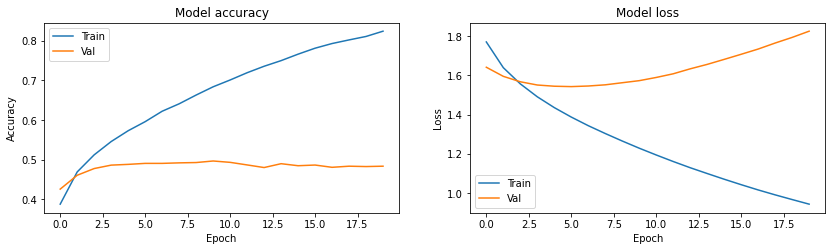

In [32]:
plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.2)

plt.subplot(121)
# Plot training & validation accuracy values
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])

plt.subplot(122)
# Plot training loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

You should see that if we only use ordinary Artificial Neural Networks, overfitting occurs during training.

You can improve this using more advanced architecture such as Convolutional Neural Network, which you will learn later. 

You can also improve the model by adding more advanced optimization scheme such as adding Dropout Layer, Batch Normalization Layer, Regularizers, and so on.

> For Dropout, see [Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) and [research paper](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) 

> For Batch Normalization, see [Tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization) and [research paper](http://proceedings.mlr.press/v37/ioffe15.pdf)

---
## 6 - Evaluate Model

Now let's test the model to the unseen dataset.

First, convert testing dataset and its targets into tensor

In [34]:
tf_X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
tf_y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

Then call the test_step function, and get the output tuple containing logits, loss, and accuracy

we should get accuracy around `48%`

In [35]:
test_logits, test_loss, test_accuracy = test_step(tf_X_test, tf_y_test)

# get the predicted class
y_pred = tf.argmax(test_logits, axis=1, output_type=tf.int32)

print('Completed testing on', tf_X_test.shape[0], 'examples...')
print('Loss: {:.3f}, Accuracy: {:.3%}'.format(test_loss, test_accuracy))

Completed testing on 10000 examples...
Loss: 2.313, Accuracy: 49.180%


---
## 7 - View Result
Now to visualize some of the model's predictions:

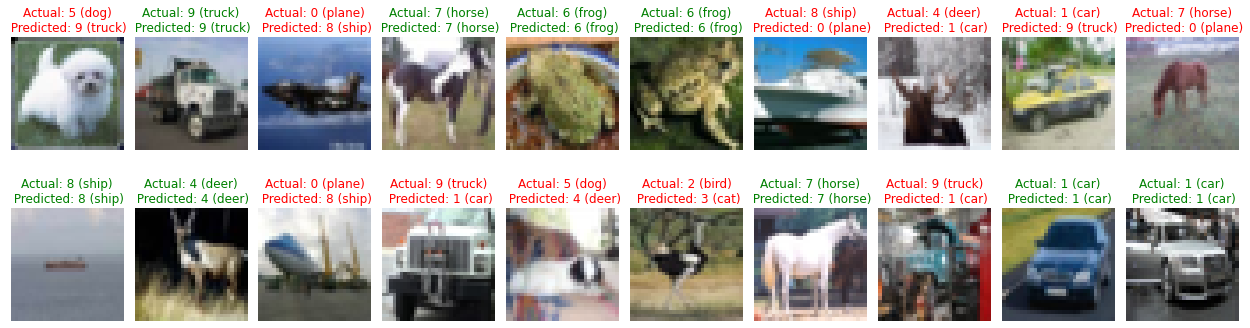

In [36]:
fig, ax = plt.subplots(2,10,figsize=(22,6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
label = y_test.ravel()
for j in range(0,2):
    for i in range(0, 10):

        img_index = np.random.randint(0, 10000)
        ax[j,i].imshow(X_test_ori[img_index])

        actual_label    = int(y_test[img_index])
        predicted_label = int(y_pred[img_index])

        color = 'red'
        if actual_label == predicted_label:
            color = 'green'

        ax[j,i].set_title("Actual: {} ({})\n Predicted: {} ({})".format(
            actual_label, class_names[actual_label], predicted_label, class_names[predicted_label]
            ), color=color)
        ax[j,i].axis('off')
plt.show()

---
# [Part 5] Keras API Training Function

---
## 1 - One-Hot Matrix

Up until now, we're using the `sparse categorical cross-entropy` loss since our targets are integers (index of the labels). Depending on your dataset, you might find dataset with one-hot encoded tagets.

One-hot representations are usually good for categorical classes (multi-class problems) where no such ordinal relationship exists. In this case, a one-hot encoding can be applied to label representation as it has clear interpretation and its values are separated each is in different dimension.

It is more intuitive if you implement the softmax loss from scratch. However, using one-hot representation may slow down the training when you have hundreds of classes to classify.

For that, the first step that we have to do is convert the target into what is known as one-hot matrix. It change the target label into a sparse matrix with size of class number, with one in the index of the label and zeros in everywhere else. 

With Keras, we can use **to_categorical** functions from **tf.keras.utils** module. And when we're using one-hot representations as target, we can use `categorical cross-entropy` for the loss.

In [37]:
from tensorflow.keras.utils import to_categorical

y_train_hot = to_categorical(y_train, 10)
y_val_hot   = to_categorical(y_val, 10)
y_test_hot  = to_categorical(y_test, 10)


example of 10 first one-hot label from training data

In [38]:
print('  |   |  class:\ni | y |  0 1 2 3 4 5 6 7 8 9\n---------------------------------')
for i in range(10):
    print(i, '|', y_train[i], '|', y_train_hot[i,:].astype('int'))

  |   |  class:
i | y |  0 1 2 3 4 5 6 7 8 9
---------------------------------
0 | [6] | [0 0 0 0 0 0 1 0 0 0]
1 | [9] | [0 0 0 0 0 0 0 0 0 1]
2 | [9] | [0 0 0 0 0 0 0 0 0 1]
3 | [4] | [0 0 0 0 1 0 0 0 0 0]
4 | [1] | [0 1 0 0 0 0 0 0 0 0]
5 | [1] | [0 1 0 0 0 0 0 0 0 0]
6 | [2] | [0 0 1 0 0 0 0 0 0 0]
7 | [7] | [0 0 0 0 0 0 0 1 0 0]
8 | [8] | [0 0 0 0 0 0 0 0 1 0]
9 | [3] | [0 0 0 1 0 0 0 0 0 0]


---
## 2 - Define Model

Same as before, we define the classifier model that takes in (a batch of) $[32\times32\times3]$ CIFAR-10 images as we've seen above, and outputs predictions about which class the image belongs to. 


> <font color='red'>**EXERCISE**: </font> Define your classification model. 

You can define the model using Sequential or Functional API. You can also experiment by trying to change the layer type, activation functions, and number of neurons. 

For this model, use `softmax` activation for the output layer.

In [41]:
model = Sequential([
                             
    Flatten(input_shape=image_shape),  

    Dense(256, activation='relu'),   # add a dense layer with 256 neurons and relu activation
    Dense(128, activation = 'relu'),   # add a dense layer with 128 neurons and relu activation
    Dense(10, activation = 'softmax'),   # add a dense layer with 10 neurons and softmax activation

], name='my_model')


Show the model summary

In [42]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


---
## 3 - Compile Model

When using the Keras API, to register loss functions and its optimization function, we use `.compile()` method. Conveniently, we can choose the loss, optimizer, and metrics using their string identifier.

In [43]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


To see the string identifier for loss functions, see [keras losses](https://keras.io/api/losses/) or [tf.keras losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

To see the string identifier for optimizers, see [keras optimizers](https://keras.io/api/optimizers/) or [tf.keras optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

---
## 4 - Train Model

Now we can train the model by calling the &nbsp; `.fit()` &nbsp; method.

Run the training process for epoch=5 with batch size=100

In [44]:
num_epochs = 20
batch_size = 128

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit(X_train, y_train_hot, 
                    validation_data=(X_val, y_val_hot),
                    epochs=num_epochs, 
                    batch_size=batch_size, 
                    callbacks = [tensorboard_callback],
                    verbose=2)

Epoch 1/20
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
313/313 - 2s - loss: 1.7901 - accuracy: 0.3917 - val_loss: 1.6484 - val_accuracy: 0.4311
Epoch 2/20
313/313 - 1s - loss: 1.5174 - accuracy: 0.4697 - val_loss: 1.5498 - val_accuracy: 0.4578
Epoch 3/20
313/313 - 1s - loss: 1.3933 - accuracy: 0.5091 - val_loss: 1.5239 - val_accuracy: 0.4712
Epoch 4/20
313/313 - 1s - loss: 1.3023 - accuracy: 0.5407 - val_loss: 1.4742 - val_accuracy: 0.4925
Epoch 5/20
313/313 - 1s - loss: 1.2320 - accuracy: 0.5697 - val_loss: 1.4753 - val_accuracy: 0.4977
Epoch 6/20
313/313 - 1s - loss: 1.1616 - accuracy: 0.5910 - val_loss: 1.4829 - val_accuracy: 0.4952
Epoch 7/20
313/313 - 1s - loss: 1.0992 - accuracy: 0.6145 - val_loss: 1.5211 - val_accuracy: 0.4921
Epoch 8/20
313/313 - 1s - loss: 1.0410 - accuracy: 0.6357 - val_loss: 1.5066 - val_accuracy: 0.5007
Epoch 9/20
313/313 - 1s - loss: 0.9873 - accuracy: 0.6538 - val_loss: 1.5428 - val_accuracy: 0.4996
Epoch 10/20
313/313 - 1s - l

you can further train the model simply by re-run the cell 

---
## 5 - Visualize Training History

Visualize the train-validation accuracy

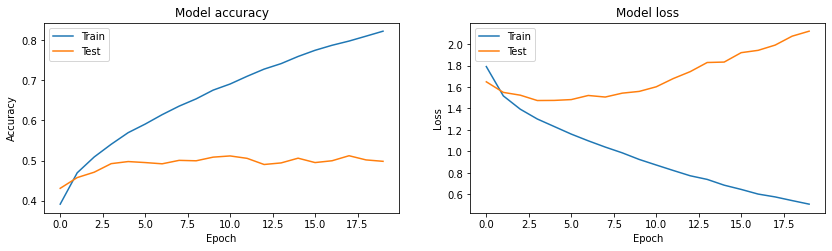

In [45]:
plt.rcParams['figure.figsize'] = [14, 3.5]
plt.subplots_adjust(wspace=0.2)

plt.subplot(121)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

plt.subplot(122)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

We can also visualize the training to Tensorboard

In [49]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

---
## 6 - Evaluate Model
Next, let's evaluate the accuracy of the models that have been trained

we should get accuracy around `48%`

In [46]:
scores = model.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 2.1320 - accuracy: 0.4930

Model Accuracy: 49.30%


---
## 7 - View Result
Now to visualize some of the model's predictions:

In [47]:
y_pred = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred, axis=1)

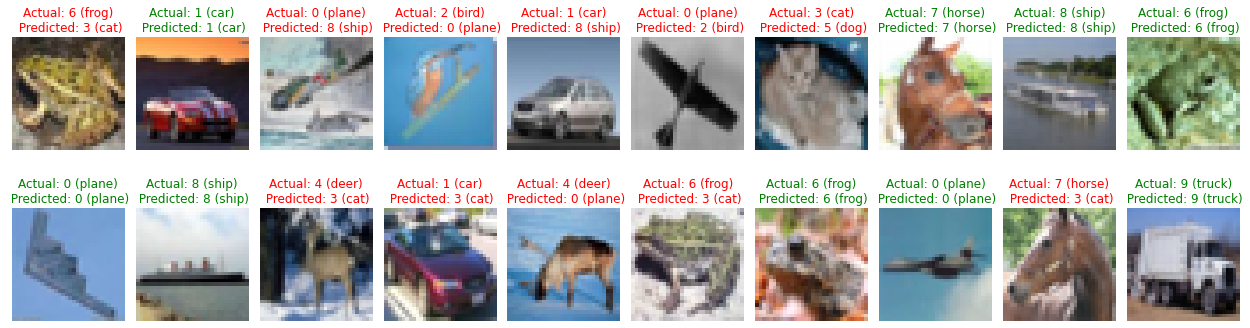

In [48]:
fig, ax = plt.subplots(2,10,figsize=(22,6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for j in range(0,2):
    for i in range(0, 10):

        img_index = np.random.randint(0, 10000)
        ax[j,i].imshow(X_test_ori[img_index])

        actual_label    = int(y_test[img_index])
        predicted_label = int(y_pred[img_index])

        color = 'red'
        if actual_label == predicted_label:
            color = 'green'

        ax[j,i].set_title("Actual: {} ({})\n Predicted: {} ({})".format(
            actual_label, class_names[actual_label], predicted_label, class_names[predicted_label]
            ), color=color)
        ax[j,i].axis('off')
plt.show()

---

# Congratulation

<font size=5> You've Completed Practical 1</font>

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/andityaarifianto/>2020 - ADF</a> </p>